In [32]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
df_all_casting=pd.read_csv("../data/AllMoviesCastingRaw.csv", sep=";")
df_all_details = pd.read_csv("../data/AllMoviesDetailsCleaned.csv", sep=";")

/tmp/ipykernel_6453/2749835164.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_details = pd.read_csv("../data/AllMoviesDetailsCleaned.csv", sep=";")


In [ ]:
def show(df_, rows=20, cols=30, title=None):
    if title:
        display(HTML(f'<h2 >{title}</h2 > '))
        with pd.option_context('display.min_rows', rows, 'display.max_columns', cols):
            display(df_)
    return df_

def get_var(df, var_name):
    globals()[var_name] = df
    return df

df= (df_all_casting
        .set_index("UWI")
        # .pipe(show, rows=3, title="set_index to UWI")
        .rename(columns={k: k.lower().replace(' ', '_') for k in df_.columns})
        # .rename(columns={"on_production_since_75_month": "since_2010_On_Production"})
        # .pipe(show, rows=3, title="replace space with _")
        # .query("Producing Zone in ['DVRN']")
        # .pipe(show, rows=3, title="Keeping just DVRN")
        # .query("Fluid in ['Gas','Shale Gas']")
        # .pipe(show, rows=3, title="keeping Gas")
        # .pipe(get_var, 'new_cols')  #new_cols is a data frame that we can inspect
        .assign(target_bin=lambda well_data_: pd.qcut(well_data_["cum_prd_gas_first(12)_prod_(e3m3)"], 5, labels= ["very_low","low", "mid","high", "very_high"]))
        .assign(target_bin=lambda well_data_: well_data_.target_bin.astype(object))  

        )

    

In [43]:
df=(df_all_details
    .query("status in ['Released']")
    .pipe(lambda df_:df_.replace("none",np.NaN))
    .assign(revenue=lambda df_:df_.revenue.replace(0,np.NAN))
    .dropna(subset="revenue")
    .drop(columns=["id","budget","imdb_id","original_title",
                   "overview","popularity","status","tagline","title","vote_average","vote_count",
                   "production_companies",	"production_countries"])
    
)
df.head(2)

,genres,original_language,release_date,revenue,runtime,spoken_languages,production_companies_number,production_countries_number,spoken_languages_number
2,Crime|Comedy,en,25/12/1995,4300000.0,98.0,English,2,1,1
3,Action|Thriller|Crime,en,15/10/1993,12136938.0,110.0,English,3,2,1


In [44]:
df.shape

(8658, 9)

In [45]:
#analyse 
df.original_language.value_counts()

en    6923
es     240
fr     213
ru     186
hi     143
ja     120
de      86
it      76
zh      75
ta      74
ml      71
ko      65
cn      64
ar      38
te      35
tr      28
pt      28
sv      26
da      20
nl      15
th      13
ro      10
ur       8
fa       8
no       7
hu       7
vi       6
bn       6
pl       6
el       6
he       5
cs       4
fi       4
pa       4
tl       3
id       3
is       2
ms       2
mr       2
sk       2
kn       2
lt       2
ca       2
sr       2
bm       2
hy       1
ka       1
xx       1
gl       1
nb       1
dv       1
sq       1
ab       1
bs       1
cy       1
ht       1
af       1
gu       1
Name: original_language, dtype: int64

<AxesSubplot:>

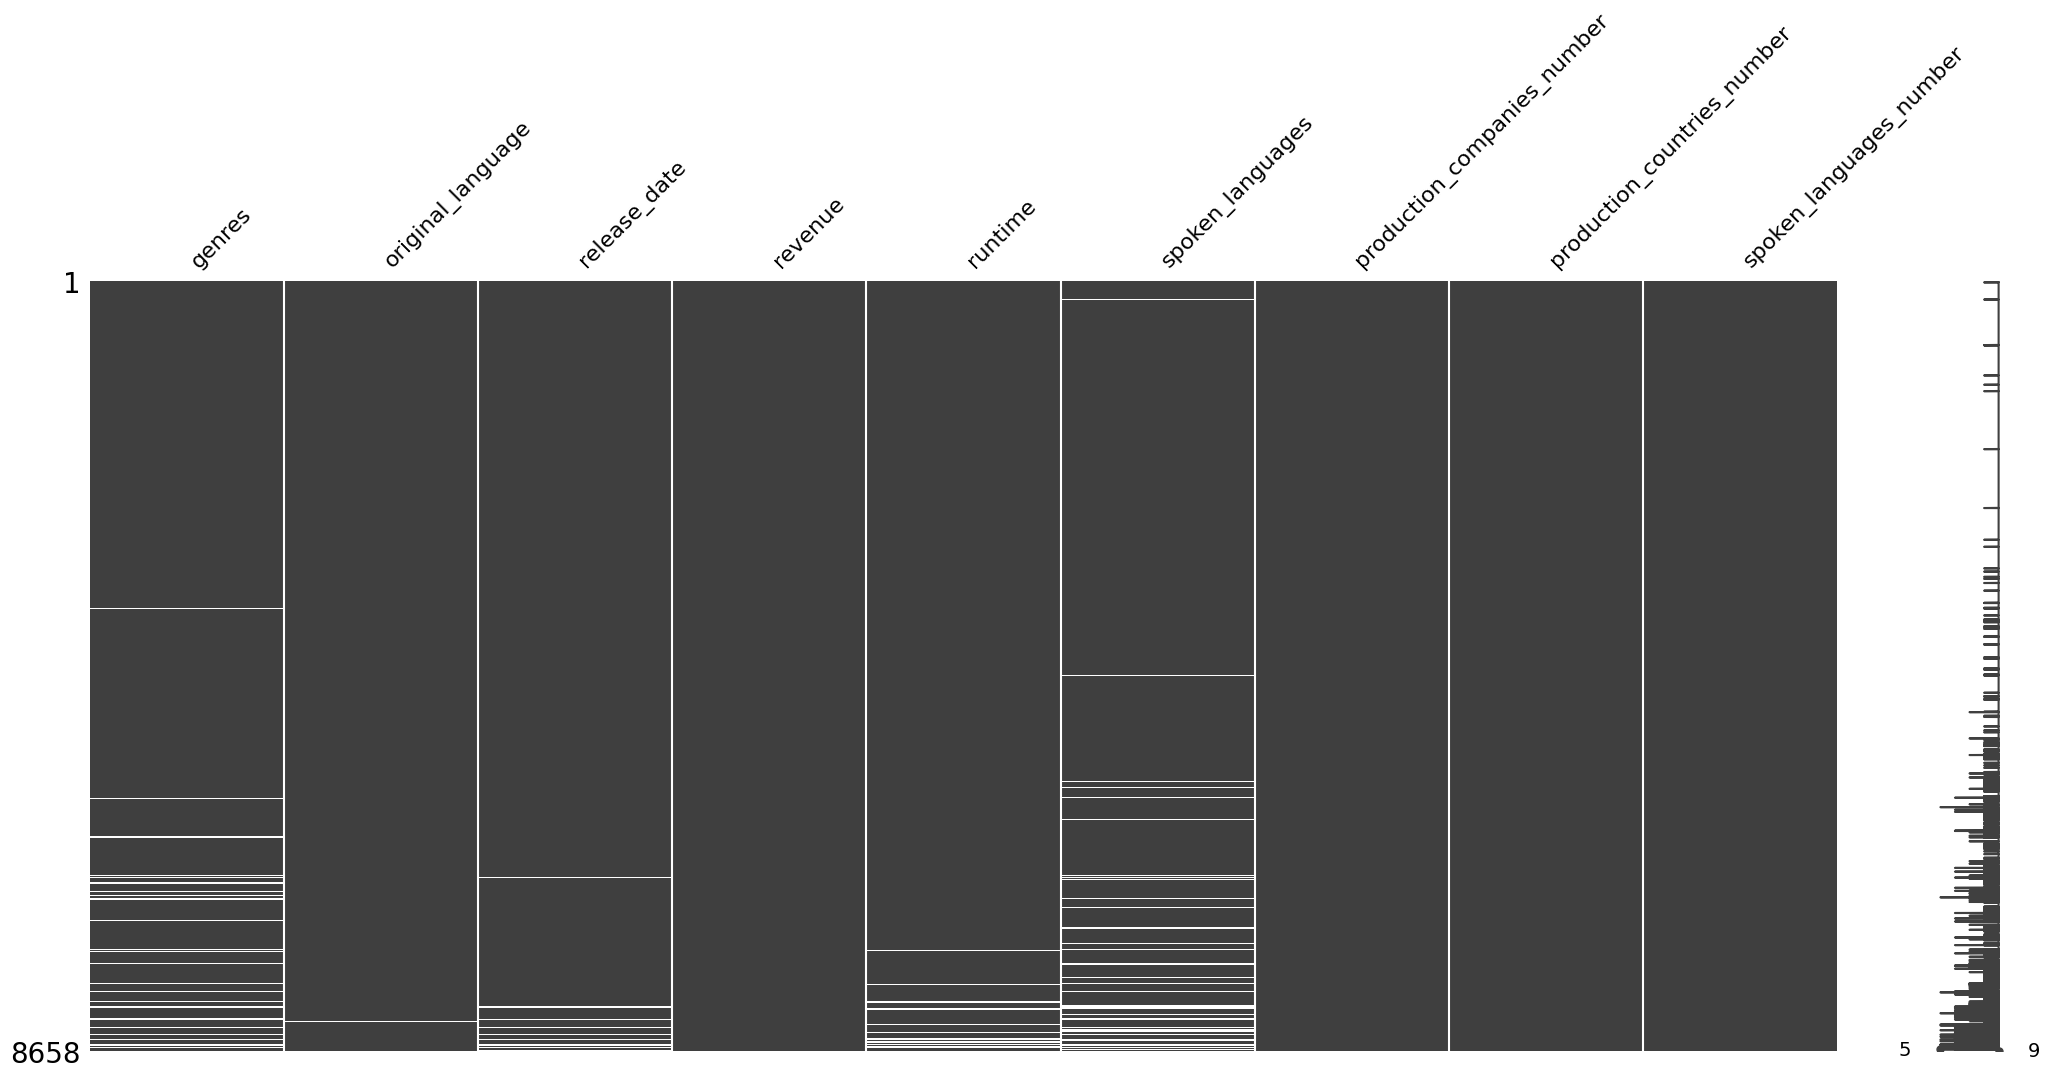

In [46]:
msno.matrix(df)

In [47]:
#replace nones with some nonsence variables
#calculate age
#calculate vectorized genres
#calculate director weight
#calculate cast weights